# Árvores de decisão e florestas aleatórias em Python

Este é o código que aborda sobre os métodos de árvores de decisões em Python.

## Visão geral do problema
A cifose é um distúrbio da coluna em que uma curva excessiva da coluna para fora resulta em um arredondamento anormal da parte superior das costas. A condição é às vezes conhecida como "arredondamento" ou - no caso de uma curva acentuada - como "corcunda". A cifose pode ocorrer em qualquer idade, mas é comum durante a adolescência. Muitos pacientes são operados de cifose e mesmo após a operação o distúrbio pode estar presente.

Portanto, o problema em questão é prever, olhando para os vários fatores do paciente, se o paciente ainda tem distúrbio de cifose após a operação ou não.

Por ser um problema de classificação, uma boa maneira de abordar esse problema é por meio de algoritmos de Árvores de Decisão e Floresta Aleatória.

## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtendo os dados

In [ ]:
df = pd.read_csv('kyphosis.csv')

In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Detalhes do conjunto de dados
O conjunto de dados contém as seguintes colunas:

Kyphosis: Esta coluna representa que o paciente teve cifose e foi submetido a uma cirurgia corrigida da coluna vertebral. Portanto, esta coluna basicamente diz se a condição de cifose estava presente ou ausente após a operação

Age: Idade do paciente em meses (o conjunto de dados é um conjunto de dados de crianças)

Number: Número de vértebras envolvidas na operação

Start: número da primeira vértebra ou vértebra superior que foi operada

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.shape

(81, 4)

In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## EDA (Exploratory Data Analysis)

Vamos observar um simples pairplot para este pequeno conjunto de dados.

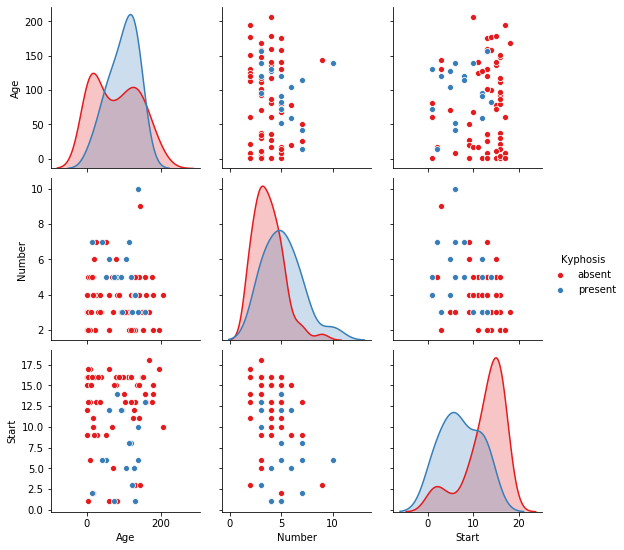

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Divisão treino-teste

Vamos dividir os dados em um conjunto de treinamento e um conjunto de testes!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
# Instantiating Decision Tree model (basically creating a decision tree object)

In [ ]:
dtree.fit(X_train,y_train)
# Training or fitting the model on training data

DecisionTreeClassifier()

## Previsão e Avaliação

Vamos avaliar a nossa árvore de decisão.

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.65      0.76      0.70        17
     present       0.20      0.12      0.15         8

    accuracy                           0.56        25
   macro avg       0.43      0.44      0.43        25
weighted avg       0.51      0.56      0.53        25



In [ ]:
print(confusion_matrix(y_test,predictions))

[[14  7]
 [ 3  1]]


## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

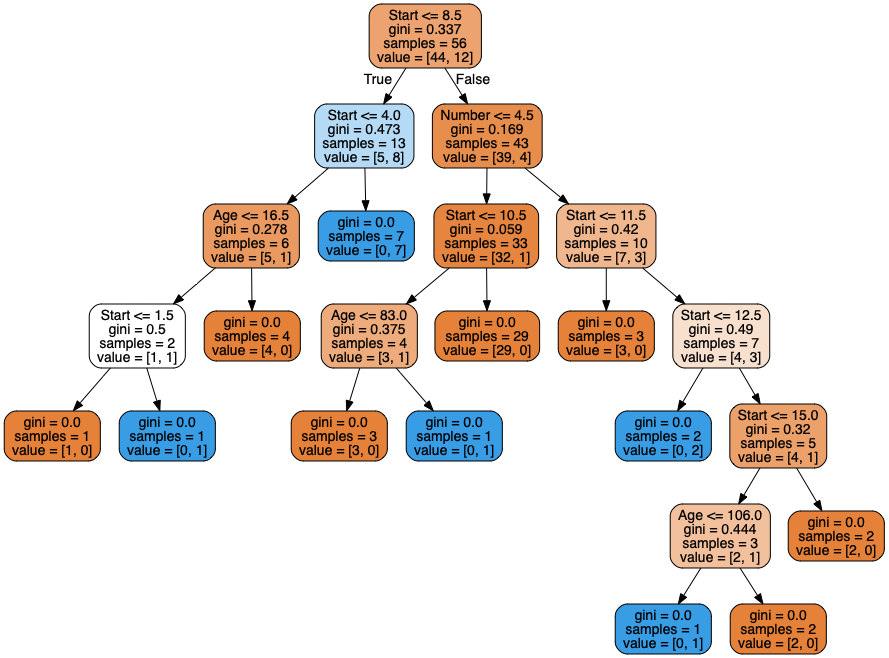

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Florestas aleatórias

Agora vamos comparar o modelo da árvore de decisão com uma floresta aleatória.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[16  1]
 [ 7  1]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.70      0.94      0.80        17
     present       0.50      0.12      0.20         8

    accuracy                           0.68        25
   macro avg       0.60      0.53      0.50        25
weighted avg       0.63      0.68      0.61        25

